In [ ]:
# gt
#   "down_x_offset": -1079.2,
#   "down_y_offset": -1254.1

#   "down_x_offset": -912.54,
#   "down_y_offset": -1254.1

#   "down_x_offset": -745.87,
#   "down_y_offset": -1254.1

#   "down_x_offset": -579.21,
#   "down_y_offset": -1254.1

#   "down_x_offset": -412.54,
#   "down_y_offset": -1254.1

#   "down_x_offset": -245.88,
#   "down_y_offset": -1254.1

In [ ]:
# 0.5 0.3
#   gt                              solution
#   "down_x_offset": -1079.2,       "down_x_offset": -1086.25,
#   "down_y_offset": -1254.1        "down_y_offset": -1254.01

#   "down_x_offset": -912.54,       "down_x_offset": -1003.99,
#   "down_y_offset": -1254.1        "down_y_offset": -1254.03

#   "down_x_offset": -745.87,       "down_x_offset": -847.62,
#   "down_y_offset": -1254.1        "down_y_offset": -1254.14

#   "down_x_offset": -579.21,       "down_x_offset": -688,
#   "down_y_offset": -1254.1        "down_y_offset": -1254.38

#   "down_x_offset": -412.54,       "down_x_offset": -541.05,
#   "down_y_offset": -1254.1        "down_y_offset": -1254.69

#   "down_x_offset": -245.88,       "down_x_offset": -463.61,
#   "down_y_offset": -1254.1        "down_y_offset": -1254.94

In [ ]:
# 0.51 0.31
#   gt                              solution
#   "down_x_offset": -1079.2        "down_x_offset": -1078.46,       
#   "down_y_offset": -1254.1        "down_y_offset": -1254     

#   "down_x_offset": -912.54,       
#   "down_y_offset": -1254.1        

#   "down_x_offset": -745.87,       
#   "down_y_offset": -1254.1        

#   "down_x_offset": -579.21,       
#   "down_y_offset": -1254.1        

#   "down_x_offset": -412.54,       
#   "down_y_offset": -1254.1        

#   "down_x_offset": -245.88,       
#   "down_y_offset": -1254.1       

#   "down_x_offset": -746.54,  "down_x_offset": -746.54,
#   "down_y_offset": -1254.12  "down_y_offset": -1254.12

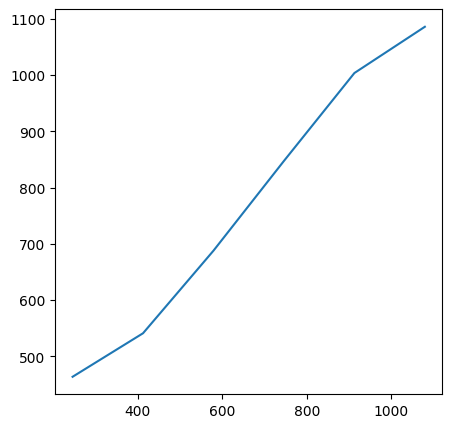

[0.9935097813578827, 0.9089134353927828, 0.8799580000471909, 0.841875, 0.7624803622585714, 0.5303595694657147]
4.8
999.9899999999999
782.2599999999999
1.2783345690691075
3.8350037072073224 2.3010022243243933


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from queue import deque

x = [1079.2, 912.54, 745.87, 579.21, 412.54, 245.88]
y = [1086.25, 1003.99, 847.62, 688, 541.05, 463.61]

plt.rcParams["figure.figsize"] = (5,5)
fig, ax = plt.subplots(1,1)
ax.plot(x,y)
plt.show()
print([(xx/yy) for xx,yy in zip(x,y)])


print(0.5*6+0.3*6)
print(1245.87-245.88)
print(1245.87-463.61)

print((1245.87-245.88)/(1245.87-463.61))

In [69]:
next = np.array([-912.54, -1254.1, 0.0])

actual = np.array([-1078.2, -1255, 0.5])
gt = np.array([-1079.2, -1254.1, 0.0])

# Rotate to compensate d yaw
error = gt - actual
step = next - gt

vector = np.array([[step[0]], 
                   [step[1]]])


a = np.deg2rad(error[2])
matrix = np.array([[np.cos(a), -np.sin(a)], 
                   [np.sin(a), np.cos(a)]])

result = np.dot(matrix, vector)

propagated = np.array([[step[0] + error[0]], [step[1] + error[1]], [0]])

pwm = np.array([[255], [255]])
rotated_pwm = np.dot(matrix, pwm)
factor = np.max(rotated_pwm)/255
rotated_pwm /= factor
print(rotated_pwm)

# Rotate to compensate d y
rotated_error = np.dot(matrix.T, np.array([[error[0]], [error[1]]]))

theta_1_rad = np.arctan(propagated[0] / propagated[1])
theta_2_rad = np.pi/2 - theta_1_rad

matrix2 = np.array([[np.cos(theta_2_rad), -np.sin(theta_2_rad)], 
                   [np.sin(theta_2_rad), np.cos(theta_2_rad)]])

rotated_pwm = np.dot(matrix2.T, rotated_pwm)
factor = np.max(rotated_pwm)/255
rotated_pwm /= factor

print(rotated_pwm)

# Scale to compensate d x
k = 1
scale = k*((propagated[0] - step[0]) / propagated[0] + 1)
rotated_pwm *= scale
print(rotated_pwm)



[[255.        ]
 [250.58780209]]
[[[255.        ]
  [247.87905489]]]
[[[253.46070264]
  [246.38274284]]]
